# Forest Offsets Paper — Figure 1


In [1]:
import json
import os

import fsspec
import matplotlib.pyplot as plt
import numpy as np

## Load the data


In [2]:
with fsspec.open(
    "https://carbonplan-forests.s3.us-west-2.amazonaws.com/offsets/archive/results/reclassification-crediting-error.json",
    "r",
) as f:
    data = json.load(f)

In [3]:
with fsspec.open(
    "https://carbonplan-forests.s3.us-west-2.amazonaws.com/offsets/database/forest-offsets-database-v1.0.json",
    "r",
) as f:
    db = json.load(f)
db = list(filter(lambda x: ~(x["id"] == "ACR360") & ~(x["id"] == "CAR1102"), db))

In [4]:
def get(id):
    return [x for x in db if x["id"] == id][0]

In [5]:
# TODO:
numbers = {
    "all": (474, 192996530.0),
    "all_forest": (130, 156069203.0),
    "compliance_ifm": (74, 131462946.0),
    "upfront_ifm": (72, 120954134.0),
}

In [6]:
numbers["analyzed"] = (
    len(data.keys()),
    np.sum([get(key)["arbocs"]["issuance"] for key in data.keys()]),
)

## Make the plot


In [7]:
numbers

{'all': (474, 192996530.0),
 'all_forest': (130, 156069203.0),
 'compliance_ifm': (74, 131462946.0),
 'upfront_ifm': (72, 120954134.0),
 'analyzed': (65, 102064294.0)}

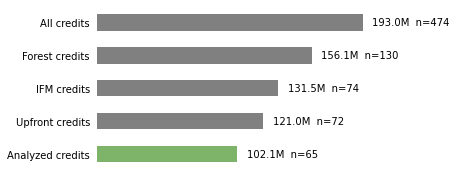

In [ ]:
cats = ["analyzed", "upfront_ifm", "compliance_ifm", "all_forest", "all"]
colors = {
    "analyzed": "#7eb36a",
    "upfront_ifm": "#808080",
    "compliance_ifm": "#808080",
    "all_forest": "#808080",
    "all": "#808080",
}

words = {
    "analyzed": "Analyzed credits",
    "upfront_ifm": "Upfront credits",
    "compliance_ifm": "IFM credits",
    "all_forest": "Forest credits",
    "all": "All credits",
}

fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.barh(
    [words[c] for c in cats],
    width=[numbers[c][1] for c in cats],
    height=0.5,
    color=[colors[c] for c in cats],
)
ax.xaxis.set_visible(False)
ax.yaxis.set_ticks_position("none")

rects = ax.patches
for rect, c in zip(rects, cats):
    n, size = numbers[c]
    size /= 1e6
    label = f"{size:.1f}M  n={n}"
    offset = 7000000
    ax.text(
        rect.get_x() + rect.get_width() + offset,
        rect.get_y() + rect.get_height() / 2,
        label,
        ha="left",
        va="center",
    )

fname = "Figure-1.svg"

plt.savefig(fname)